# Estudo de Correlação entre variáveis - Lei nº 8313/91 (Lei Rouanet)

   A Lei Rouanet, oficialmente conhecida como Lei Federal de Incentivo à Cultura, é uma legislação brasileira que permite a captação de recursos financeiros por projetos culturais através de incentivos fiscais. Empresas e pessoas físicas podem destinar parte do imposto devido para financiar atividades artísticas e culturais aprovadas pelo Ministério da Cultura. A lei busca promover a democratização do acesso à cultura e o desenvolvimento da produção cultural no país, estimulando a realização de projetos nas áreas de música, teatro, cinema, artes plásticas, entre outros.

   A correlação entre variáveis é uma medida estatística que avalia o grau de associação ou relação entre duas ou mais variáveis. É um indicador numérico que varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação. A correlação permite compreender se as variáveis se movem juntas ou em direções opostas, fornecendo informações sobre a força e a direção da relação entre elas. Essa análise é amplamente utilizada em estudos de pesquisa, análise de dados e tomada de decisões em várias áreas, como economia, ciências sociais e saúde.

Esse estudo tem por objetivo responder as seguintes questões:

1. O percentual captado, sendo esse a divisão entre o valor captado e o valor aprovado, sofre influência do valor aprovado? Ou seja, quanto maior for o valor do projeto, maior, proporcionalmente, o valor captado?
2. O percentual captado sofre influência da quantidade de projetos do proponente? Ou seja, quanto mais projetos o proponente tiver, maior, proporcionalmente, o valor captado?
3. O percentual captado sofre influência do tempo disponível para captação? Ou seja, quanto mais tempo o projeto tiver para captar, maior,proporcionalmente, o valor captado?
4. O percentual captado varia, consideravelmente, de acordo com a Área Cultural do projeto?

In [1]:
#Importando bibliotecas que serão utilizadas no estudo.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import statsmodels.api as st
import numpy as np

In [2]:
#Leitura da base de dados dos projetos. Foram utilizadas informações de projetos que captaram, iniciaram e concluíram a execução, de forma a garantir a precisão dos dados.
#Os dados foram extraídos do painel "aplicacoes.cultura.gov.br/comparar", menu Projetos. Os dados são de 29.05.23.
#Foram selecionadas as seguintes situações: E-17, E-20, E-24, E-25, E-27, E-63 e E-68.

base_pronac=pd.read_excel("Base_Pronac_ 29-05-23.xlsx")
base_pronac=pd.DataFrame(base_pronac)

In [3]:
#Ajustes da tipologia dos dados de acordo com a natureza das colunas.
base_pronac["Pronac"]=base_pronac["Pronac"].astype(str)
base_pronac['Dt. Entrada']=pd.to_datetime(base_pronac['Dt. Entrada'],dayfirst=True)
base_pronac['Dt. Situação']=pd.to_datetime(base_pronac['Dt. Situação'],dayfirst=True)
base_pronac['Dt. Início Execução']=pd.to_datetime(base_pronac['Dt. Início Execução'],dayfirst=True)
base_pronac['Dt. Fim Execução']=pd.to_datetime(base_pronac['Dt. Fim Execução'],dayfirst=True,errors='coerce')
base_pronac['Dt Início Captação']=pd.to_datetime(base_pronac['Dt Início Captação'],dayfirst=True)
base_pronac['Dt. Fim Captação']=pd.to_datetime(base_pronac['Dt. Fim Captação'],dayfirst=True,errors='coerce')

In [4]:
#Verificação dos títulos das colunas da base de dados.
base_pronac.columns=['Pronac', 'Nome do Projeto', 'Proponente', 'Área Cultural',
       'Segmento Cultural', 'Situação', 'Fase do Projeto', 'Dt. Entrada',
       'Dt. Situação', 'Dt. Início Execução', 'Dt. Fim Execução',
       'Dt Início Captação', 'Dt. Fim Captação', 'Vl. Solicitado',
       'Vl. Aprovado', 'Vl. Captado', 'Perc. Captado', 'Vl. Comprovado',
       'Perc. Comprovado']

In [5]:
#Criação das colunas'Projetos do Proponente', com a quantidade de projetos que o proponente tem na base, e 
#'Tempo de captação', com a contagem de dias que o projeto teve disponpivel para realizar a captação.

base_pronac['Projetos do Proponente'] = base_pronac["Proponente"].map(base_pronac['Proponente'].value_counts())
base_pronac['Tempo de captação'] = (base_pronac['Dt. Fim Captação'] - base_pronac['Dt Início Captação']).dt.days

In [6]:
#Impressão do tipo de dados de cada coluna para checagem inicial.
base_pronac.dtypes

Pronac                            object
Nome do Projeto                   object
Proponente                        object
Área Cultural                     object
Segmento Cultural                 object
Situação                          object
Fase do Projeto                   object
Dt. Entrada               datetime64[ns]
Dt. Situação              datetime64[ns]
Dt. Início Execução       datetime64[ns]
Dt. Fim Execução          datetime64[ns]
Dt Início Captação        datetime64[ns]
Dt. Fim Captação          datetime64[ns]
Vl. Solicitado                   float64
Vl. Aprovado                     float64
Vl. Captado                      float64
Perc. Captado                    float64
Vl. Comprovado                   float64
Perc. Comprovado                 float64
Projetos do Proponente           float64
Tempo de captação                float64
dtype: object

In [7]:
#Ajuste dos dados.
#Ajustes realizados: Exclusão de linhas com entradas inválidas, ajuste do percentual captado, exclusão de outliers de percentuais captados e de tempo de captação.
base_pronac.dropna()
base_pronac['Perc. Captado']=base_pronac['Perc. Captado']/100
base_pronac=base_pronac[base_pronac['Perc. Captado'] <= 2]
base_pronac=base_pronac[base_pronac['Perc. Captado'] > 0]
base_pronac=base_pronac[base_pronac['Tempo de captação'] > 0]

In [8]:
#Impressão dos dados para checagem inicial.
base_pronac.head()

,Pronac,Nome do Projeto,Proponente,Área Cultural,Segmento Cultural,Situação,Fase do Projeto,Dt. Entrada,Dt. Situação,Dt. Início Execução,...,Dt Início Captação,Dt. Fim Captação,Vl. Solicitado,Vl. Aprovado,Vl. Captado,Perc. Captado,Vl. Comprovado,Perc. Comprovado,Projetos do Proponente,Tempo de captação
0,587,Janela para o Mundo - Sudeste,AUDICHROMO CRIACAO EM AUDIO VISUAIS E EDITORA ...,Humanidades,Biblioteca,E24 - Apresentou prestação de contas,Avaliação dos resultados da ação cultural,2000-03-20,2004-02-09,NaT,...,2002-01-01,2002-12-31,651547.00,632325.41,394000.00,0.623097,0.0,0.0,13.0,364.0
1,598,Meu Livro de Leitura,IPAD - Instituto de Planejamento e Apoio ao De...,Humanidades,Periódicos,E24 - Apresentou prestação de contas,Avaliação dos resultados da ação cultural,2000-03-21,2017-11-23,2005-01-31,...,2002-01-01,2002-12-31,1404545.00,302720.00,129600.00,0.428118,0.0,0.0,3.0,364.0
2,755,A Viagem de Thomas Ender ao Brasil.,Instituto de Fomento Social e Cultural Brasil ...,Humanidades,Edição de Livros,E25 - Análise de resposta de diligência - Objeto,Avaliação dos resultados da ação cultural,2000-05-24,2022-06-01,NaT,...,2001-01-01,2001-12-31,914412.37,914412.37,640000.00,0.699903,0.0,0.0,4.0,364.0
3,797,Implementação da Produção e Distribuição de Li...,Fundação Dorina Nowill Para Cegos,Humanidades,Edição de Livros,E24 - Apresentou prestação de contas,Avaliação dos resultados da ação cultural,2000-06-14,2010-08-19,NaT,...,2002-01-01,2002-12-31,1683186.50,1687024.92,1683604.72,0.997973,0.0,0.0,18.0,364.0
4,799,Brasil Rupestre,Manati Produções Editoriais Ltda.,Humanidades,Edição de Livros,E24 - Apresentou prestação de contas,Avaliação dos resultados da ação cultural,2000-06-21,2017-11-23,2006-01-31,...,2003-01-01,2003-12-31,291310.00,232358.47,198200.00,0.852992,0.0,0.0,3.0,364.0


A correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. É calculada a partir da covariância entre as variáveis, dividida pelo produto dos desvios padrão de cada variável. O coeficiente de correlação de Pearson varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação. É uma medida amplamente utilizada para verificar a intensidade e a direção da relação entre as variáveis e é sensível a valores extremos. A correlação de Pearson pressupõe uma relação linear entre as variáveis e não é adequada para medir associações não-lineares.
Nesse estudo será utilizada para verificar se há relação linear entre as variáveis: 'Perc. Captado', 'Vl. Aprovado', 'Projetos do Proponente'e 'Tempo de captação'.

In [9]:
#Aplicando a correlação de Pearson
correlation_pearson = base_pronac[['Perc. Captado', 'Vl. Aprovado', 'Projetos do Proponente','Tempo de captação']].corr()
print(correlation_pearson)

                        Perc. Captado  Vl. Aprovado  Projetos do Proponente  \
Perc. Captado                1.000000     -0.083975                0.047778   
Vl. Aprovado                -0.083975      1.000000                0.138449   
Projetos do Proponente       0.047778      0.138449                1.000000   
Tempo de captação           -0.016314      0.024645                0.030772   

                        Tempo de captação  
Perc. Captado                   -0.016314  
Vl. Aprovado                     0.024645  
Projetos do Proponente           0.030772  
Tempo de captação                1.000000  


**Análise dos resultados:**

Com base nos dados fornecidos, podemos observar as correlações entre as variáveis "Perc. Captado", "Vl. Aprovado", "Projetos do Proponente" e "Tempo de captação".

* A correlação entre "Perc. Captado" e "Vl. Aprovado" é de -0.083975, indicando uma correlação negativa fraca. Isso sugere que há uma tendência de que um aumento no valor aprovado esteja associado a uma diminuição no percentual captado.

* A correlação entre "Perc. Captado" e "Projetos do Proponente" é de 0.047778, mostrando uma correlação positiva muito fraca. Isso sugere que há uma tendência leve de que um maior número de projetos do proponente esteja associado a um maior percentual captado.

* Por fim, a correlação entre "Perc. Captado" e "Tempo de captação" é de -0.016314, indicando uma correlação negativa muito fraca. Isso sugere que há uma tendência muito leve de que um aumento no tempo de captação esteja associado a uma diminuição no percentual captado.

Em resumo, com base nessas correlações, não há uma relação linear forte entre as variáveis analisadas, indicando que elas podem ter pouca influência direta umas sobre as outras. É importante ressaltar que essas correlações se baseiam nos dados apresentados e podem não capturar completamente a relação entre as variáveis em questão.

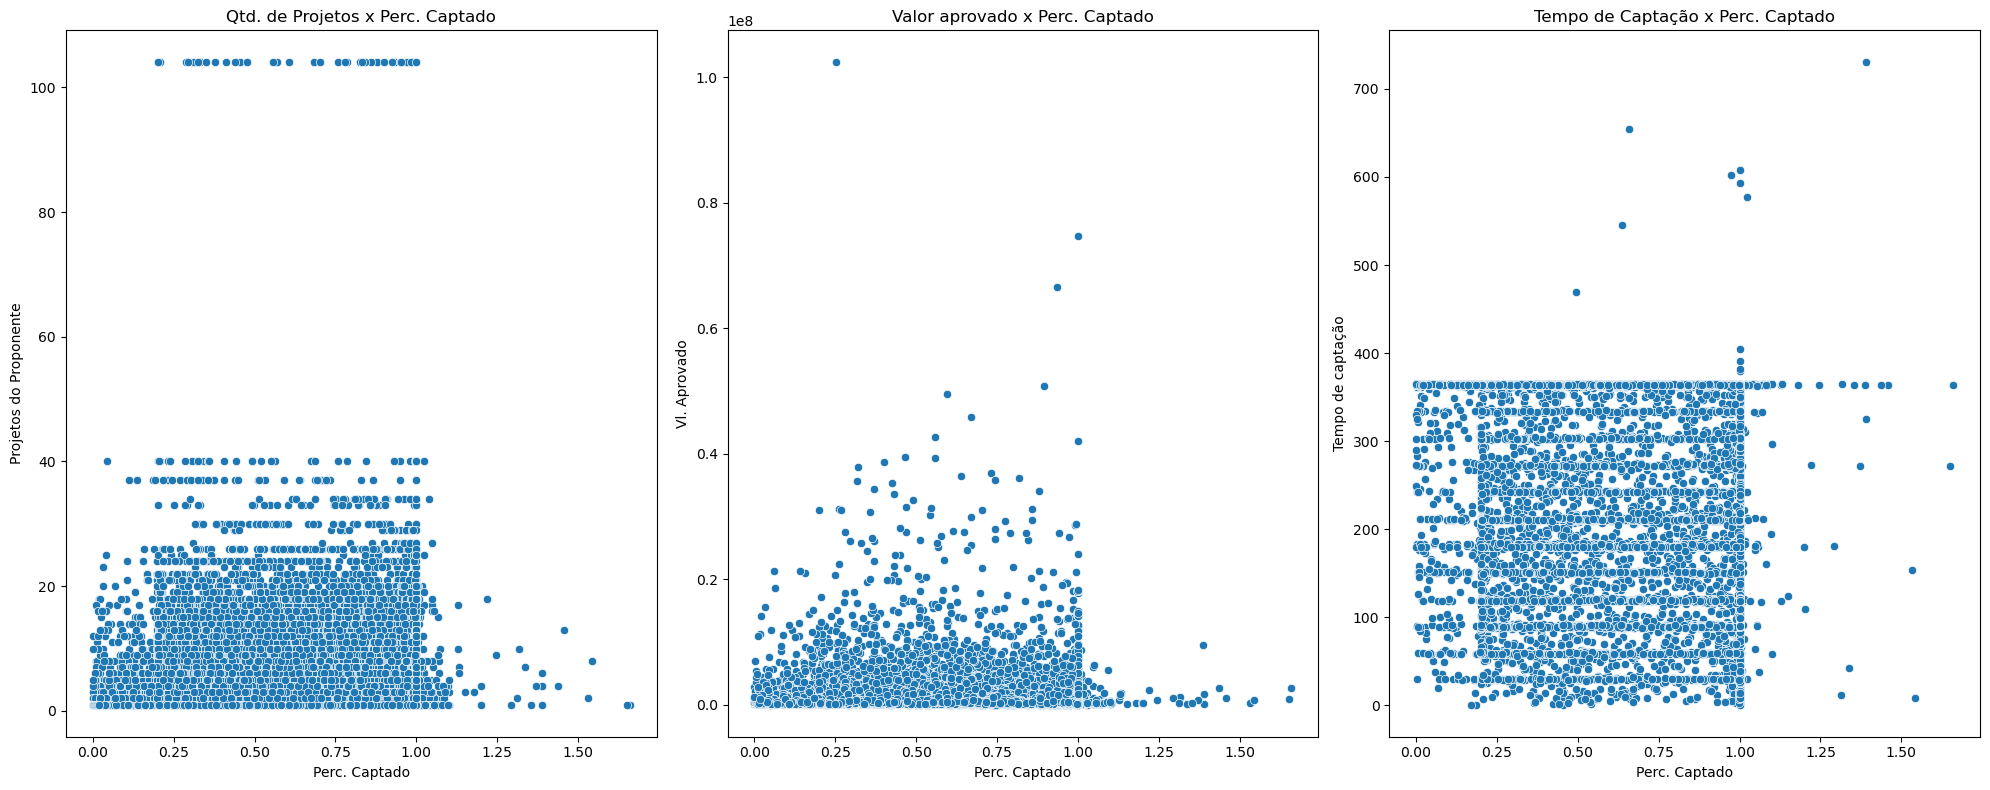

In [21]:
# Criação dos gráficos de dispersão
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sea.scatterplot(data=base_pronac,x='Perc. Captado',y='Projetos do Proponente')
plt.title("Qtd. de Projetos x Perc. Captado")

plt.subplot(1, 3, 2)
sea.scatterplot(data=base_pronac,x='Perc. Captado',y='Vl. Aprovado')
plt.title("Valor aprovado x Perc. Captado")

plt.subplot(1, 3, 3)
sea.scatterplot(data=base_pronac,x='Perc. Captado',y='Tempo de captação')
plt.title("Tempo de Captação x Perc. Captado")

# Exibição dos gráficos de dispersão
plt.tight_layout()
plt.show()

Um gráfico de dispersão é uma visualização que representa a relação entre duas variáveis quantitativas. Ele é construído por meio de pontos em um plano cartesiano, em que cada ponto representa uma observação da combinação dessas duas variáveis.

O eixo horizontal (eixo x) representa uma das variáveis e o eixo vertical (eixo y) representa a outra variável. Cada ponto no gráfico de dispersão representa um par de valores correspondentes a essas duas variáveis.

Ao traçar os pontos, é possível identificar padrões ou tendências na relação entre as variáveis. Se os pontos estiverem espalhados aleatoriamente pelo gráfico, isso pode indicar uma ausência de relação ou correlação entre as variáveis. Por outro lado, se houver uma forma geral ou padrão nos pontos, isso pode indicar uma relação positiva (os pontos se aproximam de uma linha diagonal crescente) ou uma relação negativa (os pontos se aproximam de uma linha diagonal decrescente) entre as variáveis.

O gráfico de dispersão também permite identificar a dispersão ou a concentração dos pontos em torno da tendência geral. Pontos mais próximos da linha de tendência indicam uma relação mais forte, enquanto pontos mais afastados podem indicar maior variação ou heterogeneidade nos dados.

Em resumo, um gráfico de dispersão é uma ferramenta visual eficaz para identificar e explorar a relação entre duas variáveis quantitativas, ajudando a entender padrões, tendências e variabilidade nos dados.

No caso acima, verifica-se que o primeiro e o terceiro gráfico tem comportamento randômico, não apresentando tendência de relação entre as variáveis. O segundo gráfico, por sua vez, apresenta grande randomicidade com leve relação entre as variáveis "Valor aprovado" e "Percentual captado."

**Aplicação do modelo Ordinary Least Square:**

O modelo OLS (Ordinary Least Squares) é um método de regressão usado para estimar a relação entre uma variável dependente e uma ou mais variáveis independentes. Ele busca encontrar a linha ou curva que melhor se ajusta aos dados, minimizando a soma dos quadrados dos resíduos (diferenças entre os valores observados e os valores previstos pelo modelo). O OLS assume que os resíduos são independentes, têm média zero e distribuição normal. Os coeficientes estimados pelo modelo OLS representam o efeito médio das variáveis independentes na variável dependente. O modelo OLS é amplamente utilizado em análise estatística e econometria para estudar relações entre variáveis e fazer previsões.

Nesse estudo será aplicado o modelo OLS para quantificar a relação entre as variáveis 'Perc. Captado' e 'Vl. Aprovado', uma vez que foi a única relação, ainda que leve, identificada no modelo de Pearson e visualmente nos gráficos de dispersão.

In [15]:
#Aplicando o modelo OLS para 'Perc. Captado' x 'Vl. Aprovado'
y=base_pronac['Perc. Captado']
x=base_pronac['Vl. Aprovado']
x=st.add_constant(x)
modelo=st.OLS(y,x)
resultado=modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          Perc. Captado   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 30 May 2023   Prob (F-statistic):           7.24e-29
Time:                        11:39:31   Log-Likelihood:                -3296.6
No. Observations:               17567   AIC:                             6597.
Df Residuals:                   17565   BIC:                             6613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6904      0.002    288.011   

**Análise do modelo OLS:**

Com base nos resultados da regressão linear, podemos interpretar a relação entre as variáveis "Perc. Captado" e "Vl. Aprovado" da seguinte forma:

Coeficiente de regressão (coef): O coeficiente para a variável "Vl. Aprovado" é de -8.526e-09. Isso significa que, mantendo todas as outras variáveis constantes, um aumento de uma unidade em "Vl. Aprovado" está associado a uma diminuição de -8.526e-09 em "Perc. Captado".

Valor-p (P>|t|): O valor-p para a variável "Vl. Aprovado" é igual a 0.000, indicando que é estatisticamente significante. Isso significa que a relação entre "Vl. Aprovado" e "Perc. Captado" é improvável de ocorrer ao acaso.

R-quadrado (R-squared): O valor do R-quadrado é de 0.007, o que significa que apenas 0.7% da variabilidade em "Perc. Captado" pode ser explicada pela variável "Vl. Aprovado". Isso indica que a variável "Vl. Aprovado" tem uma influência limitada na explicação das variações em "Perc. Captado".

Coeficiente de constante (const): O coeficiente de constante é 0.6904, o que representa o valor esperado de "Perc. Captado" quando todas as variáveis independentes são zero.

Em resumo, com base nos resultados da regressão linear, podemos dizer que há uma relação estatisticamente significante entre as variáveis "Perc. Captado" e "Vl. Aprovado", onde um aumento no valor aprovado está associado a uma diminuição no percentual captado. No entanto, a influência do "Vl. Aprovado" na explicação da variação do "Perc. Captado" é bastante baixa, conforme indicado pelo baixo valor do R-quadrado.

In [12]:
#Utilizando o método describe para calcular medidas estatísticas agrupando o oercentual captado pelas áreas culturais.
base_pronac['Perc. Captado'].groupby(base_pronac['Área Cultural']).describe()

,count,mean,std,min,25%,50%,75%,max
Área Cultural,,,,,,,,
Artes Cênicas,5745.0,0.662711,0.291157,0.000305,0.412390,0.685620,0.971270,1.651889
Artes Integradas,811.0,0.648206,0.299242,0.003467,0.386459,0.677755,0.967248,1.457627
Artes Visuais,1726.0,0.676014,0.285841,0.000934,0.439920,0.716664,0.976673,1.312657
Audiovisual,844.0,0.761761,0.263134,0.000003,0.562862,0.848795,0.999079,1.660164
Humanidades,2828.0,0.754236,0.278980,0.000021,0.534309,0.867919,1.000000,1.532176
Museus e Memória,71.0,0.756742,0.317685,0.065301,0.502250,0.890260,0.995812,1.543541
Música,4336.0,0.648139,0.294209,0.000024,0.396381,0.670174,0.956036,1.353416
Patrimônio Cultural,1206.0,0.666079,0.312511,0.000177,0.400000,0.728577,0.988076,1.387965


**Breve explicação dos dados estatísticos coletados:**

1. Contagem (count): É o número de observações não nulas no conjunto de dados. Ele fornece uma medida da quantidade de dados disponíveis para cada variável.

2. Média (mean): É a média aritmética dos valores no conjunto de dados. Ela fornece uma medida central dos dados, representando um valor típico do conjunto.

3. Desvio padrão (std): É uma medida de dispersão que indica o quanto os valores do conjunto de dados se desviam da média. Ele quantifica a variabilidade dos dados, sendo um indicador da dispersão dos valores ao redor da média.

4. Valor mínimo (min) e valor máximo (max): Representam, respectivamente, o menor e o maior valor observado no conjunto de dados. Eles fornecem uma ideia dos limites inferior e superior dos valores presentes.

5. Quartis (25%, 50% e 75%): São valores que dividem o conjunto de dados em quatro partes iguais, representando percentis específicos. O quartil de 25% (ou primeiro quartil) indica o valor abaixo do qual 25% dos dados estão localizados, enquanto o quartil de 50% (ou mediana) divide os dados em duas partes iguais. O quartil de 75% (ou terceiro quartil) indica o valor abaixo do qual 75% dos dados estão localizados. Os quartis fornecem uma medida da distribuição dos dados ao longo da escala de valores.

Esses cálculos resumem informações estatísticas importantes sobre os dados, permitindo uma rápida compreensão de sua distribuição, tendências centrais e variabilidade.

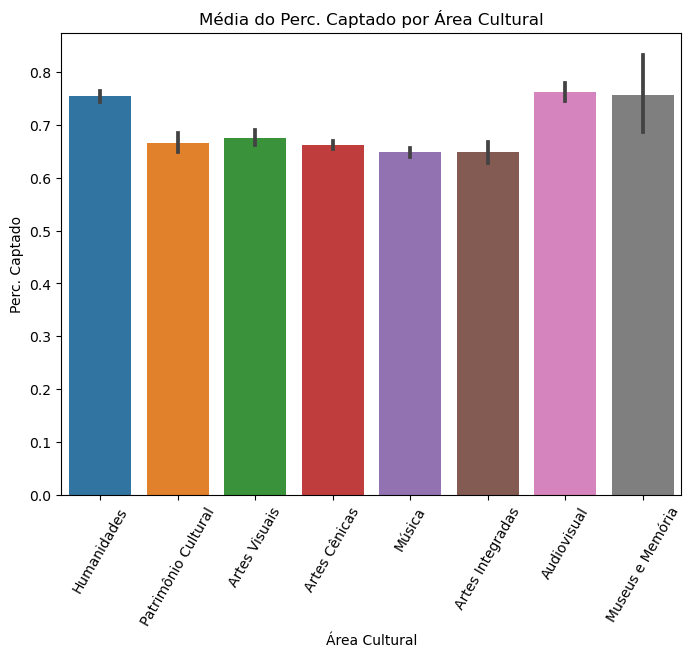

In [13]:
# Criação do gráfico de barras
plt.figure(figsize=(8, 6))
ax=sea.barplot(x='Área Cultural', y='Perc. Captado', data=base_pronac, estimator=np.mean)

# Configuração dos rótulos e título do gráfico
plt.xlabel('Área Cultural')
plt.ylabel('Perc. Captado')
plt.title('Média do Perc. Captado por Área Cultural')

# Exibição do gráfico
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

**Análise estatística da captação por Área Cultural:**

Ao analisar os dados fornecidos para diferentes áreas culturais, em especial o gráfico de barras apresentado acima, podemos observar algumas tendências interessantes.

Artes Cênicas apresenta uma média de 0.662711, com um desvio padrão de 0.291157, indicando uma dispersão considerável nos valores. Os quartis mostram que 25% dos valores estão abaixo de 0.412390, enquanto 75% estão abaixo de 0.971270.

Artes Integradas, Artes Visuais e Música possuem médias próximas, em torno de 0.648, indicando um desempenho semelhante na captação de recursos. Os desvios padrão também são comparáveis, sugerindo uma dispersão relativamente consistente em relação às médias.

Audiovisual e Humanidades se destacam com médias mais altas de 0.761761 e 0.754236, respectivamente. Isso sugere que essas áreas têm tido um desempenho relativamente bom na captação de recursos, com uma menor variabilidade nos valores.

Museus e Memória apresentam uma amostra menor, mas uma média de 0.756742 e um desvio padrão de 0.317685, indicando uma maior variabilidade em relação às outras áreas.

Vale ressaltar que um desvio padrão de 30%, que é a média aproximada dos desvios apresentados (0,30), significa que os valores individuais tendem a variar em torno de 30% da média. Isso indica uma dispersão considerável dos dados em relação ao valor médio. Em outras palavras, os valores podem estar bastante distantes da média, o que indica uma variabilidade substancial nos dados. Ou seja, o percentual captado, independente da área, aparenta ser heterogêneo.

Esses dados nos fornecem insights sobre o desempenho das diferentes áreas culturais em relação à captação de recursos. Áreas como Audiovisual e Humanidades parecem ter uma tendência mais consistente na obtenção de recursos, enquanto outras, como Museus e Memória, possuem uma maior variação nos resultados. Essas informações podem ser úteis para direcionar esforços e investimentos em áreas específicas com base em seu histórico de captação de recursos.

**Conclusão**

Com base no estudo apresentado, pode-se concluir que:

1. O percentual captado, sendo esse a divisão entre o valor captado e o valor aprovado, sofre influência do valor aprovado? Ou seja, quanto maior for o valor do projeto, maior, proporcionalmente, o valor captado?

A correlação entre "Perc. Captado" e "Vl. Aprovado" é de -0.083975, indicando uma correlação negativa fraca. Isso sugere que há uma fraca tendência de que um aumento no valor aprovado esteja associado a uma diminuição no percentual captado.

2. O percentual captado sofre influência da quantidade de projetos do proponente? Ou seja, quanto mais projetos o proponente tiver, maior, proporcionalmente, o valor captado?

A correlação entre "Perc. Captado" e "Projetos do Proponente" é de 0.047778, mostrando uma correlação positiva muito fraca. Isso sugere que há uma tendência leve de que um maior número de projetos do proponente esteja associado a um maior percentual captado.

3. O percentual captado sofre influência do tempo disponível para captação? Ou seja, quanto mais tempo o projeto tiver para captar, maior,proporcionalmente, o valor captado?

A correlação entre "Perc. Captado" e "Tempo de captação" é de -0.016314, indicando uma correlação negativa muito fraca. Isso sugere que há uma tendência muito leve de que um aumento no tempo de captação esteja associado a uma diminuição no percentual captado.

4. O percentual captado varia, consideravelmente, de acordo com a Área Cultural do projeto?

Sim, com base nos dados fornecidos, podemos observar que o percentual captado varia consideravelmente de acordo com a Área Cultural do projeto. Cada área cultural possui uma média diferente de percentual captado, indicando que há diferenças significativas na captação de recursos entre as áreas. Por exemplo, o Audiovisual apresenta a maior média de percentual captado, com 0.761761, seguido de perto por Humanidades, Museus e Memória, e Patrimônio Cultural. Por outro lado, Artes Cênicas, Artes Integradas, Artes Visuais e Música têm médias ligeiramente mais baixas.Essas diferenças sugerem que projetos em algumas áreas culturais têm maior sucesso na captação de recursos, enquanto outras áreas podem enfrentar desafios adicionais. Essa variação na captação de recursos pode ser influenciada por vários fatores, como o público-alvo, o escopo e o apelo dos projetos em cada área cultural. Portanto, é importante considerar a Área Cultural ao avaliar e planejar estratégias de captação de recursos para projetos culturais, uma vez que diferentes áreas podem exigir abordagens distintas para maximizar o sucesso na obtenção de recursos.